In [2]:
# сделайте DataFrame с колонкой "Salary" со значениями [145000, 152000, 161000].
# 1) Преобразуйте их в строки вида "45000 руб." и сохраните в новой колонке.
# 2) Из полученных строк извлеките обратно числа и приведите их к типу int во второй новой колонке.
import pandas as pd
df=pd.DataFrame({
    "Salary":[145000, 152000, 161000]
    })
df["NEWCOLUMNSalary"]=df["Salary"].astype(str)+" руб."
df["SECONDnewcolumn"]=df["NEWCOLUMNSalary"].str.replace(" руб.", "", regex=False)
df["SECONDnewcolumn"]=df["SECONDnewcolumn"].astype(int)
print(df)
print(df.dtypes)

# используйте .astype(str) + конкатенацию; для извлечения - .str.replace(" руб.", "", regex=False) + .astype(int)
#            или .str.extract(r'(\d+)') + .astype(int).

   Salary NEWCOLUMNSalary  SECONDnewcolumn
0  145000     145000 руб.           145000
1  152000     152000 руб.           152000
2  161000     161000 руб.           161000
Salary              int64
NEWCOLUMNSalary    object
SECONDnewcolumn     int64
dtype: object


In [3]:
# Постройте DataFrame с колонкой "URL" (например: ["https://site.org", "http://example.com", "https://docs.org"]).
# Отфильтруйте строки, где адрес оканчивается на ".org".
import pandas as pd
df=pd.DataFrame({
    "Salary":["https://site.org", "http://example.com", "https://docs.org"]
    })
print(df)
df_filt= df[df['Salary'].str.contains(r'\.org$', regex=True)]
print("Filtered_df", df_filt)
# примените булеву маску через .str.contains(r'\.org$', regex=True) и индексацию df[mask].

               Salary
0    https://site.org
1  http://example.com
2    https://docs.org
Filtered_df              Salary
0  https://site.org
2  https://docs.org


In [4]:
# Постройте DataFrame с колонкой "Record" со строками формата "id=105; user=Alice; score=92".
# Извлеките user и score в отдельные колонки (user — строка, score — число).
import pandas as pd
df=pd.DataFrame({
    "Record":['id:=105',
            'user=Alice',
            'score=92']
    })
df[["user", "score"]] = df["Record"].str.extract(r'user: (.+), score: (\d+)')


print(df)
print(df.dtypes)
# используйте .str.extract(r'user=([^;]+);\s*score=(\d+)'), затем для score — .astype(int).

       Record user score
0     id:=105  NaN   NaN
1  user=Alice  NaN   NaN
2    score=92  NaN   NaN
Record    object
user      object
score     object
dtype: object


In [5]:
import pandas as pd
df=pd.DataFrame({
    "Record":['id:105',
            'user: Alice',
            'score:92']
    })
df[["user", "score"]] = df["Record"].str.extract(r'user=([^;]+);\s*score=(\d+)')


print(df)
print(df.dtypes)

        Record user score
0       id:105  NaN   NaN
1  user: Alice  NaN   NaN
2     score:92  NaN   NaN
Record    object
user      object
score     object
dtype: object


In [10]:
# создайте Series со значениями [5, 10, 15]. Добавьте в конец значения [20, 25],
import pandas as pd
series1=pd.Series([5, 10, 15])
series2=pd.Series([20, 25])
new_series=pd.concat([series1, series2], ignore_index=True)
print (new_series)

# а затем добавьте значение [0] в начало. Перенумеруйте индексы по порядку.
new_series=pd.concat([pd.Series([0]), new_series], ignore_index=True)
print(new_series)
new_series_renumbered=new_series.reset_index(drop=True)
print(new_series_renumbered)

# объединяйте серии через pd.concat([s, pd.Series([...])], ignore_index=True);
#            для добавления в начало — pd.concat([pd.Series([0]), s], ignore_index=True).

0     5
1    10
2    15
3    20
4    25
dtype: int64
0     0
1     5
2    10
3    15
4    20
5    25
dtype: int64
0     0
1     5
2    10
3    15
4    20
5    25
dtype: int64


In [19]:
# создайте DataFrame с колонками "Name", "Age" и тремя строками.
# Добавьте сразу две новые строки с теми же колонками.
import pandas as pd
df=pd.DataFrame({
    "Name":[ '1', '2' ,'3' ],
    "Age":[ '4', '5', '6' ]
})
new_rows=pd.DataFrame({
    "Name":[ '7', '8' ,'9' ],
    "Age":[ '10', '11', '12' ]
})
print(df)
print(new_rows)
df_new = pd.concat([df, new_rows], ignore_index=True)
print(df_new)

# сформируйте отдельный DataFrame с новыми строками и объедините через pd.concat([...], ignore_index=True).


  Name Age
0    1   4
1    2   5
2    3   6
  Name Age
0    7  10
1    8  11
2    9  12
  Name Age
0    1   4
1    2   5
2    3   6
3    7  10
4    8  11
5    9  12


0    2
1    4
2    1
3    5
4    3
dtype: int64
Тип объекта возвращаемого методом plot:
 <class 'matplotlib.axes._axes.Axes'>


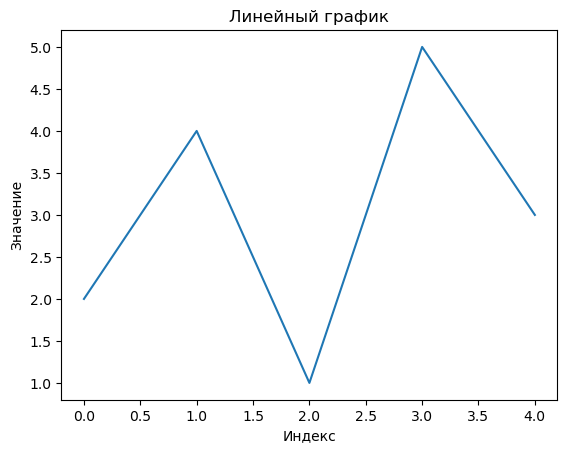

In [23]:
# создайте Series с числовыми значениями (например, [2, 4, 1, 5, 3]) и постройте линейный график.
# Добавьте заголовок и подписи осей.
import pandas as pd

s=pd.Series([2, 4, 1, 5, 3])
print(s)
ax = s.plot(kind='line', title="Линейный график")
print("Тип объекта возвращаемого методом plot:\n", type(ax))
import matplotlib.pyplot as plt
plt.xlabel("Индекс")
plt.ylabel("Значение")

plt.show()
# используйте .plot(kind='line'), затем plt.title(...), plt.xlabel(...), plt.ylabel(...), plt.show().

   Sales_A  Sales_B  Sales_C
0       11       22       33


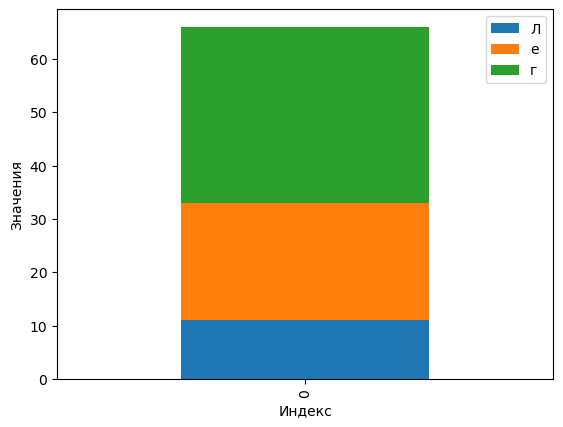

In [37]:
# создайте DataFrame с тремя числовыми колонками одинаковой длины (например, sales_A, sales_B, sales_C).
import pandas as pd
import matplotlib.pyplot as plt

df=pd.DataFrame({
    "Sales_A": [11]  ,
    "Sales_B": [22],
    "Sales_C": [33]
                })
print(df)

ax=df.plot(kind='bar', stacked=True)

plt.xlabel("Индекс")
plt.ylabel("Значения") 
plt.legend("Легенда")
plt.show()
# Постройте "стековую" столбчатую диаграмму (stacked bar) для сравнения вкладов по строкам.

# df.plot(kind='bar', stacked=True); дополнительно подпишите оси и легенду (plt.xlabel, plt.ylabel, plt.legend).


In [64]:
# создайте словарь "product" с полями: name, price, qty. Обновите price (новым значением),
# добавьте булев ключ in_stock и выведите все ключи и значения словаря.
product={
    "name":"Barbie",
    "price": 2500,
    "qty": 32
}
print(product)

new_price={"price":4500}

product.update(new_price)
print(product)

product['in_stock'] = True
print("Ключи и значения словаря:")
for key, value in product.items():
    print(f"{key}: {value}")


# используйте присваивание product['key'] = value или product.update(...); для просмотра — .keys(), .values(), .items().

{'name': 'Barbie', 'price': 2500, 'qty': 32}
{'name': 'Barbie', 'price': 4500, 'qty': 32}
Ключи и значения словаря:
name: Barbie
price: 4500
qty: 32
in_stock: True
{'name': 'Barbie', 'price': 4500, 'qty': 32, 'in_stock': True}


In [75]:
# преобразуйте список словарей вида [{'City': 'Moscow', 'Population': 12.6}, ...] в DataFrame.
dictionary=[{'City': 'Moscow', 'Population': 12.6},
            {'City': 'Novosibirsk', 'Population': 1.6},
           {'City': 'St. Petersburg', 'Population': 5.4}]
      
print("Исходный словарь:\n", dictionary)

import pandas as pd
dictionary_df=pd.DataFrame(dictionary)
print("Датафрейм из словаря (таблица):\n", dictionary_df)
# Сделайте 'City' индексом и отсортируйте по 'Population' по убыванию.

dictionary_df = dictionary_df.set_index('City')
print(dictionary_df)

dictionary_df=dictionary_df.sort_values(by='Population', ascending=False)

print(dictionary_df)
# pd.DataFrame(list_of_dicts); затем .set_index('City') и .sort_values('Population', ascending=False).


Исходный словарь:
 [{'City': 'Moscow', 'Population': 12.6}, {'City': 'Novosibirsk', 'Population': 1.6}, {'City': 'St. Petersburg', 'Population': 5.4}]
Датафрейм из словаря (таблица):
              City  Population
0          Moscow        12.6
1     Novosibirsk         1.6
2  St. Petersburg         5.4
                Population
City                      
Moscow                12.6
Novosibirsk            1.6
St. Petersburg         5.4
                Population
City                      
Moscow                12.6
St. Petersburg         5.4
Novosibirsk            1.6


In [11]:
# создайте DataFrame с колонками "Name" и "BirthYear". Добавьте вычисляемую колонку "Age" как 2025 - BirthYear
import pandas as pd
df=pd.DataFrame({
    "Name": ['Alex'],
    "BirthYear": [2019]
    })

df['Age']=2025-df["BirthYear"]
print(df)

# используйте арифметику по столбцам (df['Age'] = 2025 - df['BirthYear']) или метод .assign(Age=...).


   Name  BirthYear  Age
0  Alex       2019    6


In [13]:
# создайте DataFrame с колонками "Name" и "BirthYear". Добавьте вычисляемую колонку "Age" как 2025 - BirthYear
import pandas as pd
df=pd.DataFrame({
    "Name": ['Alex'],
    "BirthYear": [2019]
    })

print(df)
df_new=df.assign(Age=2025-df['BirthYear'])
print(df_new)

# используйте арифметику по столбцам (df['Age'] = 2025 - df['BirthYear']) или метод .assign(Age=...).


   Name  BirthYear
0  Alex       2019
   Name  BirthYear  Age
0  Alex       2019    6


In [25]:
# сохраните произвольный DataFrame в Excel (лист "Data"), затем прочитайте его обратно в DataFrame.

import pandas as pd

df=pd.DataFrame({
    "Name": ['Alex'],
    "BirthYear": [2019]
    })
Data="Data.xlsx"
try:
    df.to_excel(Data,index=False, sheet_name='Data') 
    print(f"\nФайл Excel записан: {Data}")
except Exception as e:
    print("\n[Warning] Не удалось записать Excel")
    print("Исключение:\n", repr(e))


Data_from_excel=pd.read_excel(Data, sheet_name = "Data")
print(Data_from_excel)
print(Data_from_excel.shape)
print(Data_from_excel.dtypes)
 
# После этого сохраните те же данные в CSV (без индекса) и JSON (orient='records'), прочитайте оба файла обратно.

Data_csv="data_csv.csv"

Data_from_excel.to_csv(Data_csv, index=False, encoding='utf-8')
print(f"Файл csv записан:\n {Data_csv}")
Data_from_csv = pd.read_csv(Data_csv, encoding='utf-8')
print(Data_from_csv)
print(Data_from_csv.shape)
print(Data_from_csv.dtypes)


Data_json="data_json.json"

Data_from_csv.to_json(Data_json, orient='records', force_ascii=False)
print(f"Файл json записан:\n {Data_json}")

Data_from_json=pd.read_json(Data_json, orient='records')
print(Data_from_json)
print(Data_from_json.shape)
print(Data_from_json.dtypes)



# На каждом шаге выводите форму и типы данных.   

# .to_excel(path, index=False, sheet_name='Data') и pd.read_excel(..., sheet_name='Data');
#            .to_csv(path, index=False) и pd.read_csv(...);
#            .to_json(path, orient='records', force_ascii=False) и pd.read_json(path, orient='records').



Файл Excel записан: Data.xlsx
   Name  BirthYear
0  Alex       2019
(1, 2)
Name         object
BirthYear     int64
dtype: object
Файл csv записан:
 data_csv.csv
   Name  BirthYear
0  Alex       2019
(1, 2)
Name         object
BirthYear     int64
dtype: object
Файл json записан:
 data_json.json
   Name  BirthYear
0  Alex       2019
(1, 2)
Name         object
BirthYear     int64
dtype: object
